In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

## Q1. Downloading the data

In [2]:
jan_fhv_tripdata_2021 = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet'
feb_fhv_tripdata_2021 = 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet'
january_tripdata = pd.read_parquet(jan_fhv_tripdata_2021)
febuaury_tripdata = pd.read_parquet(feb_fhv_tripdata_2021)

jan_num_records = len(january_tripdata)
print(f'There are {jan_num_records} records for January.')

There are 1154112 records for January.


## Q2. Computing duration

In [3]:
january_tripdata['duration'] = (january_tripdata.dropOff_datetime-january_tripdata.pickup_datetime).astype('timedelta64[s]')/60
print(f'The average trip duration for January is {january_tripdata.duration.mean()} minutes.')

The average trip duration for January is 19.1672240937939 minutes.


## Data preparation

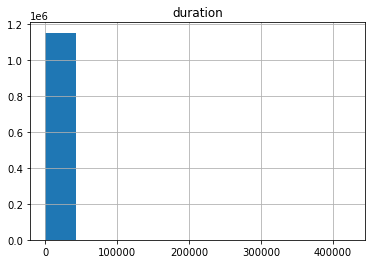

In [4]:
january_tripdata.hist('duration');

In [5]:
jan_trip_1to60_minutes = january_tripdata.copy().query('1<= duration <= 60')
print(f'{jan_num_records - len(jan_trip_1to60_minutes)} rows were dropped')

44286 rows were dropped


## Q3. Missing values

In [6]:
jan_trip_1to60_minutes.fillna(value={'PUlocationID':-1, 'DOlocationID':-1},inplace=True)
num_location_na = len(jan_trip_1to60_minutes.query('PUlocationID == -1'))
print(f'Fractions of missing values for the pickup location ID: {num_location_na/len(jan_trip_1to60_minutes)}')

jan_trip_1to60_minutes['PUlocationID'] = jan_trip_1to60_minutes['PUlocationID'].astype(int).astype(str)
jan_trip_1to60_minutes['DOlocationID'] = jan_trip_1to60_minutes['DOlocationID'].astype(int).astype(str)

Fractions of missing values for the pickup location ID: 0.8352732770722617


## Q4. One-hot encoding

In [7]:
location_ids = jan_trip_1to60_minutes[['PUlocationID','DOlocationID']]
list_of_dict = location_ids.to_dict('index').values()
vectorize_dict = DictVectorizer(sparse=True)
feature_matrix = vectorize_dict.fit_transform(list_of_dict)
print(f'The dimensionality of the matrix is {feature_matrix.shape[1]}.')

The dimensionality of the matrix is 525.


## Q5. Training a model

In [8]:
duration = jan_trip_1to60_minutes['duration']
linear_model = LinearRegression().fit(feature_matrix, duration)
predictions = linear_model.predict(feature_matrix)
print(f'RMSE of the model is {mean_squared_error(duration,predictions, squared = False)}')

RMSE of the model is 10.528519107201793


## Q6. Evaluating the model

In [9]:
febuaury_tripdata['duration'] = (febuaury_tripdata.dropOff_datetime-febuaury_tripdata.pickup_datetime).astype('timedelta64[s]')/60
febuaury_tripdata = febuaury_tripdata.copy().query('1<= duration <= 60')
febuaury_tripdata.fillna(value={'PUlocationID':-1, 'DOlocationID':-1},inplace=True)
febuaury_tripdata['PUlocationID'] = febuaury_tripdata['PUlocationID'].astype(int).astype(str)
febuaury_tripdata['DOlocationID'] = febuaury_tripdata['DOlocationID'].astype(int).astype(str)

In [10]:
feb_list_dict = febuaury_tripdata[['PUlocationID','DOlocationID']].to_dict('index').values()
feb_predictions = linear_model.predict(vectorize_dict.transform(feb_list_dict))
print(f'RMSE of the validation data is {mean_squared_error(febuaury_tripdata.duration,feb_predictions, squared = False)}')

RMSE of the validation data is 11.014283109432261
